# Understand the Problem Statement and Business Case

## Problem Statement:
The dataset provided contains detailed information about customer credit card usage and behavior. It includes various attributes such as balance, purchases, cash advances, credit limits, payments, and other transactional and behavioral metrics. The goal is to analyze this data to uncover insights into customer behavior, identify patterns, and potentially segment customers based on their credit card usage. This analysis can help the business make informed decisions to improve customer satisfaction, reduce churn, and optimize credit card offerings.

## Business Case:
Credit card companies operate in a highly competitive market where customer retention and satisfaction are critical to success. Understanding customer behavior is essential for tailoring services, identifying high-value customers, and mitigating risks such as defaults or churn. By analyzing the dataset, the company can achieve the following objectives:

1. **Customer Segmentation**: Identify distinct groups of customers based on their spending habits, payment behavior, and credit utilization. This segmentation can help in designing targeted marketing campaigns and personalized offers.

2. **Risk Assessment**: Detect customers who may pose a higher risk of default based on their payment patterns, cash advances, and credit utilization. This can help in proactive risk management and credit limit adjustments.

3. **Customer Retention**: Identify customers who are at risk of churn by analyzing their engagement levels and transaction patterns. Retention strategies, such as loyalty programs or special offers, can then be implemented to retain these customers.

4. **Revenue Optimization**: Understand which customer segments contribute the most to revenue and profitability. This insight can guide the allocation of resources and marketing budgets to maximize returns.

5. **Product Development**: Gain insights into customer preferences and behaviors to develop new credit card products or features that cater to specific customer needs.

By leveraging the insights derived from this analysis, the company can enhance its competitive edge, improve customer satisfaction, and drive business growth. The analysis will also provide actionable recommendations for optimizing credit card operations and customer relationship management.

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

The creditcard_df DataFrame consists of 18 columns and 8950 rows. All columns have complete data with not missing values. The dataset includes 3 integer-type columns, 14 float-type columns, and 1 object-type column. The object-type column is the `CUST_ID` column, which contains unique identifiers for each customer. The remaining columns are numerical and represent various aspects of customer credit card usage.

The columns are as follows:
- `CUST_ID`: Unique identifier for each customer.
- `BALANCE`: Current balance on the credit card.
- `BALANCE_FREQUENCY`: Frequency of balance updates (0-1 scale).
- `PURCHASES`: Total purchases made by the customer.
- `ONEOFF_PURCHASES`: Total one-off purchases made by the customer.
- `INSTALLMENTS_PURCHASES`: Total installment purchases made by the customer.
- `CASH_ADVANCE`: Total cash advances taken by the customer.
- `PURCHASES_FREQUENCY`: Frequency of purchases (0-1 scale).
- `ONEOFF_PURCHASES_FREQUENCY`: Frequency of one-off purchases (0-1 scale).
- `PURCHASES_INSTALLMENTS_FREQUENCY`: Frequency of installment purchases (0-1 scale).
- `CASH_ADVANCE_FREQUENCY`: Frequency of cash advances (0-1 scale).
- `CASH_ADVANCE_TRX`: Total number of cash advance transactions.
- `PURCHASES_TRX`: Total number of purchase transactions.
- `CREDIT_LIMIT`: Credit limit assigned to the customer.
- `PAYMENTS`: Total payments made by the customer.
- `MINIMUM_PAYMENTS`: Minimum payments required from the customer.
- `PRC_FULL_PAYMENT`: Percentage of full payments made by the customer.
- `TENURE`: Number of months the customer has had the credit card.

In [4]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### **Summary Statistics with Categorical Labels**

1. **Account Balance and Credit Information**:
   - **Balance**: Ranges from \$0 to \$19,043, with a mean of \$1,564.47 and a high standard deviation of \$2,081.53, indicating large variation in account balances.
   - **Credit Limit**: Varies between \$50 and \$30,000, with an average of \$4,494.45. The 75th percentile hits \$6,500, suggesting most users operate below this threshold.

2. **Purchase Behavior**:
   - **Total Purchases**: Range from \$0 to \$49,039.57, averaging around \$1,003.20. This is highly skewed (std: \$2,136.63), with half of users spending under \$361.28.
   - **One-off Purchases**: Maximum of \$40,761.25, median only \$38. This suggests occasional large outliers among mostly low one-time spenders.
   - **Installment Purchases**: Peaks at \$22,500, with a median of \$89.0, implying many users either avoid or keep installment purchases low.

3. **Cash Advances and Related Behavior**:
   - **Cash Advance Amounts**: Range from \$0 to \$47,137.21, with a mean of \$978.87. Median is \$0 — most users don't use cash advances, but those who do may do so heavily.
   - **Cash Advance Frequency**: Goes up to 1.5 times per month. The 75th percentile is 0.222, suggesting infrequent use even among users who do take advances.
   - **Cash Advance Transactions**: Range from 0 to 123, with a mean of 3.25. Again, a skewed distribution where most don’t use them.

4. **Purchase Frequency Patterns**:
   - **Purchase Frequency (All)**: Ranges from 0 to 1, with a mean of 0.49. 50% of users purchase in about half of the months.
   - **One-off Purchase Frequency**: Mean of 0.20 indicates they are less common.
   - **Installment Purchase Frequency**: Higher at a mean of 0.36, with some users (75th percentile) doing so in 75% of observed months.

5. **Transaction Count Metrics**:
   - **Purchases Transactions**: Varies from 0 to 358, average ~14.7 per user. Again, wide variance (std: 24.85).
   - **Cash Advance Transactions**: Mean of 3.25, but most users (median and 25%) report 0.

6. **Payments and Repayment Behavior**:
   - **Payments**: Huge range from \$0 to \$50,721.48, with a mean of \$1,733.14. Indicates some very high payers exist.
   - **Minimum Payments**: Data is missing for some (only 8637 values), average is \$864.20, but can go as low as \$0.019 — some accounts only make token payments.
   - **Percentage of Full Payment**: From 0 to 1, with a low mean of 0.15 — very few pay off balances in full regularly.

7. **Account Tenure**:
   - **Tenure**: All users have tenure between 6 and 12 months, with a mean of ~11.5 months. Most users are near full duration, suggesting stable accounts or limited observation window.


In [5]:
# Let's see who made one off purchase of $40761!
creditcard_df.loc[creditcard_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
creditcard_df["CASH_ADVANCE"].max()

47137.21176

In [7]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df.loc[creditcard_df["CASH_ADVANCE"] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# Visualize the Data

<Axes: >

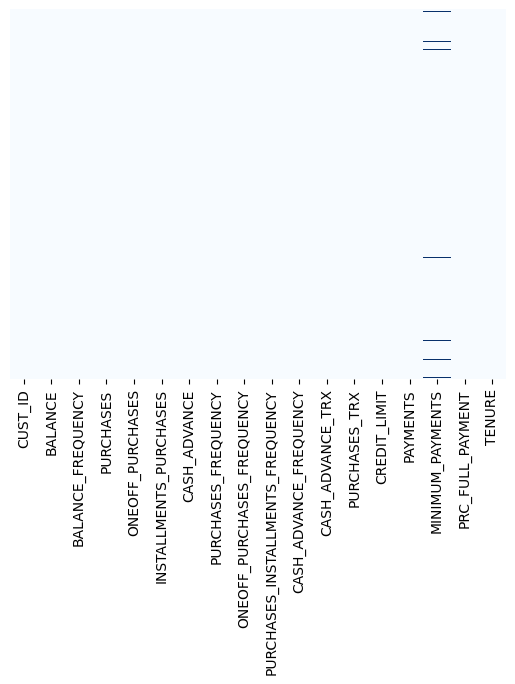

In [8]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap='Blues')

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df["CREDIT_LIMIT"].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

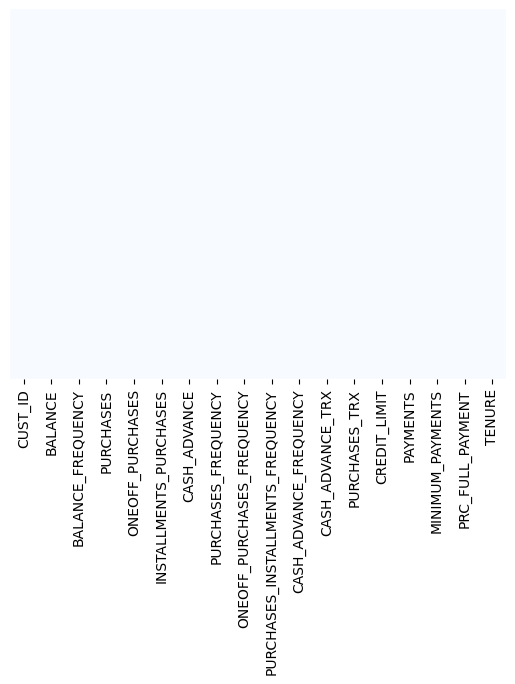

In [12]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar= False, cmap='Blues')

In [13]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [14]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop(['CUST_ID'], axis=1, inplace=True)

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(creditcard_df.columns)
n

17

In [17]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

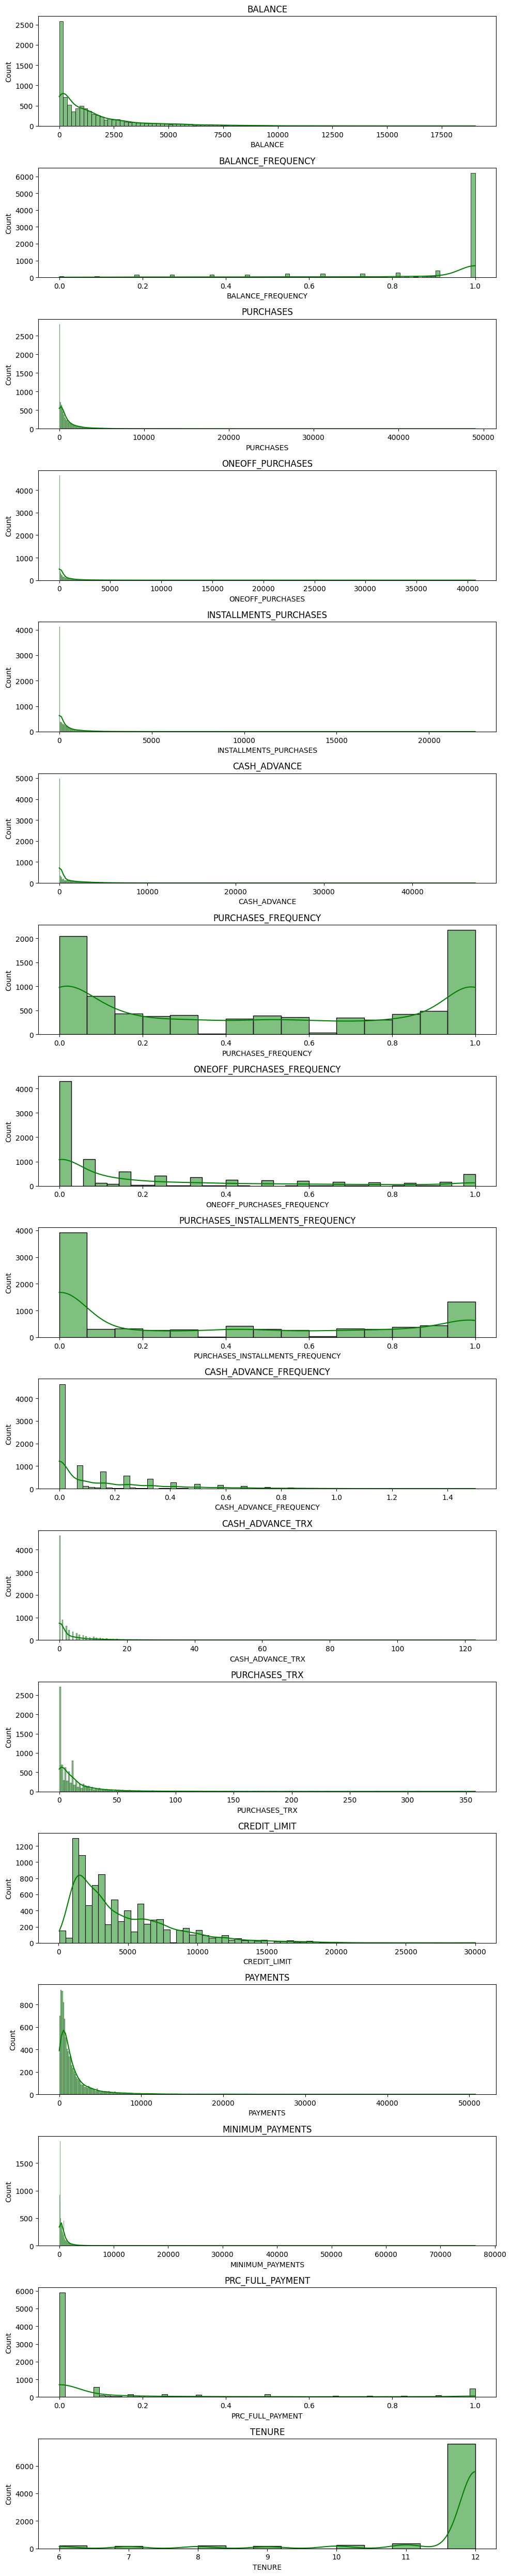

In [18]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure
plt.figure(figsize=(10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(len(creditcard_df.columns), 1, i + 1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True, color="g")
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [19]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
correlations = creditcard_df.corr()

<Axes: >

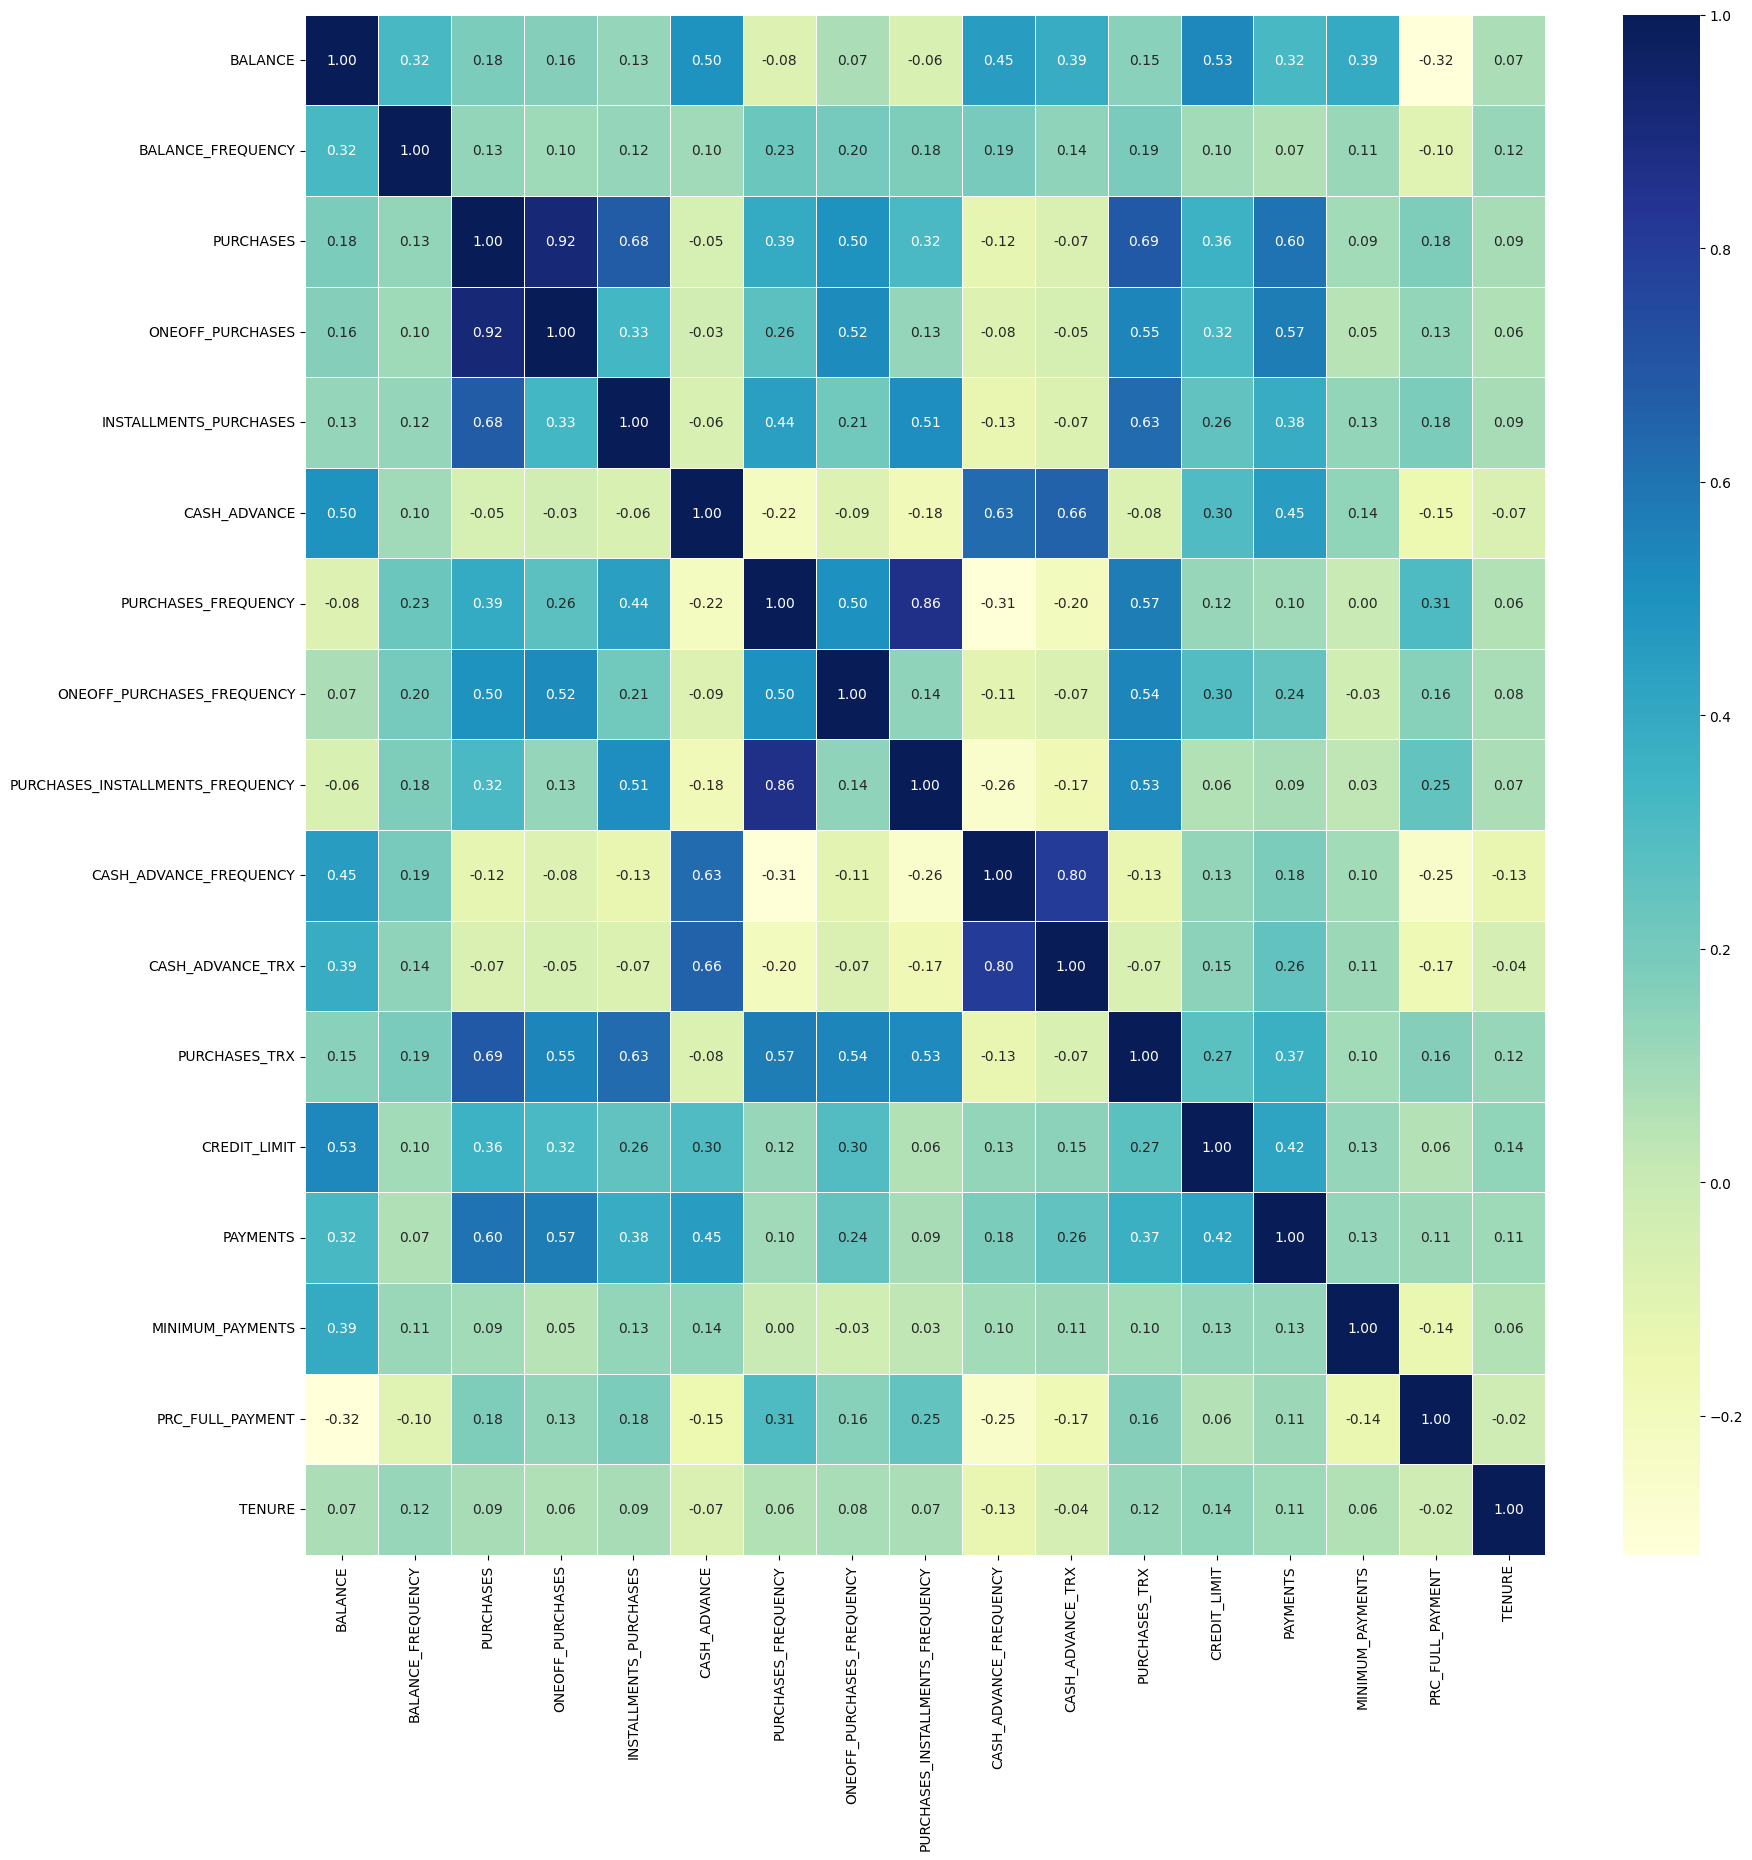

In [20]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu", ax=ax)

Okay, let's analyze the provided heatmap.

**Key Observations from the Data:**
* **Strong Positive Correlations (Dark Blue squares):**
    * `PURCHASES` and `ONEOFF_PURCHASES` (0.92): Indicates a very strong relationship; customers with high total purchase amounts tend to have high one-off purchase amounts.
    * `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY` (0.86): Frequent purchasers are also likely to make frequent installment purchases.
    * `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX` (0.80): The frequency of cash advances is strongly tied to the number of cash advance transactions.
    * `PURCHASES` and `PURCHASES_TRX` (0.69): Higher purchase amounts are moderately-to-strongly correlated with a higher number of purchase transactions.
    * `PURCHASES` and `PAYMENTS` (0.60): Higher purchase amounts tend to correspond with higher payment amounts.
* **Moderate Positive Correlations (Medium Blue/Teal squares):**
    * `CREDIT_LIMIT` and `BALANCE` (0.53): Higher credit limits are moderately associated with higher account balances.
    * `CREDIT_LIMIT` and `PURCHASES` (0.36): A moderate link between credit limit and purchase amount.
    * `CREDIT_LIMIT` and `PAYMENTS` (0.42): Higher credit limits tend to correlate with higher payments.
* **Weak Correlations (Yellow/Green squares):** Many pairs show weak linear relationships (values close to 0), such as `TENURE` with most other variables, or `BALANCE_FREQUENCY` with `CASH_ADVANCE`.
* **Negative Correlations (Lighter shades, values < 0):**
    * `BALANCE` and `PRC_FULL_PAYMENT` (-0.32): A moderate negative correlation, suggesting that customers with higher balances tend to pay a smaller percentage of their total balance each month.
    * Other weaker negative correlations exist, like `CASH_ADVANCE_FREQUENCY` vs `PURCHASES_FREQUENCY` (-0.13).

# Understand the Theory and Intuition Behind K-Mean Algorithm

K-Means is an **unsupervised learning algorithm** used to solve **clustering problems**. Its goal is to partition a given dataset into **K distinct, non-overlapping groups (clusters)** where each data point belongs to the cluster with the nearest mean (centroid), using **Euclidean distance** as a similarity measure.

#### 🔍 What is Clustering?

Clustering is the task of dividing a dataset into groups such that:
- Data points in the same group (cluster) are more similar to each other
- Data points in different clusters are as different as possible

Unlike supervised learning, **no labels** are provided — we let the algorithm **discover the structure** in the data.

---

### 📈 K-Means: Step-by-Step Intuition

Let’s break it down with a simple example where we try to cluster customers based on two features: **Age** and **Savings**.

---

#### 1. Choose the Number of Clusters (**K**)
You must specify how many clusters you want the algorithm to find. This is a hyperparameter.

---

#### 2. Initialize Centroids Randomly
Randomly choose **K data points** to act as the **initial centroids** (centers of the clusters).

---

#### 3. Assign Each Point to the Nearest Centroid
For each data point:
- Compute the distance to each centroid
- Assign the point to the nearest one
- This forms **K clusters**

---

#### 4. Update the Centroids
Recalculate the centroids by **taking the mean** of all the points in each cluster.

---

#### 5. Repeat Until Convergence
Repeat steps 3 and 4 until:
- Centroids stop moving significantly
- Cluster assignments no longer change
- Or a set number of iterations is reached

This is an **iterative refinement process**.

---

### 🔁 Visualization of the Process

- Step 1: Choose `K=2`  
- Step 2: Randomly select two centroids  
- Step 3: Assign all points to the nearest centroid  
- Step 4: Recalculate centroids  
- Step 5: Reassign points → Recalculate → Repeat...

Each iteration results in **tighter, more distinct clusters**.

---

### 📐 Distance Metric: Euclidean Distance

K-means uses **Euclidean distance** to measure similarity:
$$
\text{Distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

---

### ❓How to Choose the Optimal Number of Clusters (K)?

Choosing the right `K` is tricky. One popular method is:

#### 🔍 The Elbow Method

1. Run K-means for different values of `K` (e.g., 1 to 10)
2. For each `K`, calculate the **Within-Cluster Sum of Squares (WCSS)**:
   - Measures total variance within each cluster
3. Plot `K` vs `WCSS`
4. Look for the **“elbow”** point — where the rate of decrease sharply slows  
   👉 That’s your optimal `K`

---

### 📌 Summary

- K-Means clusters data based on **feature similarity**
- It’s fast, scalable, and works well for **spherical clusters**
- Doesn’t require labels — it’s fully unsupervised
- Needs you to specify `K` (but we can estimate it with the elbow method)
- Sensitive to initialization and scale of data — always **normalize** your features!


# Find the Optimal NUmber of Clusters Using Elbow Method

In [21]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [22]:
creditcard_df_scaled.shape

(8950, 17)

In [23]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

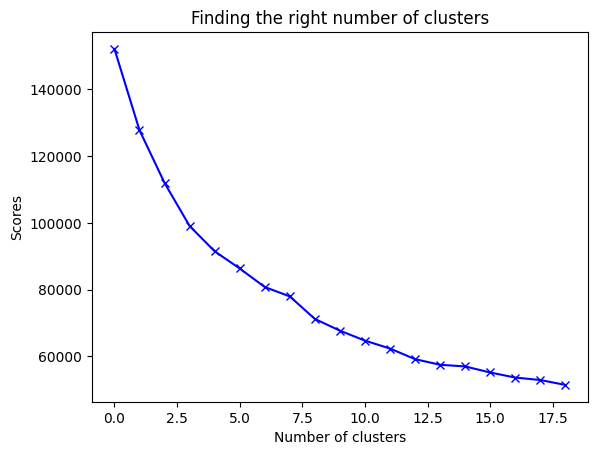

In [24]:
scores_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, "bx-")
plt.title("Finding the right number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Scores")
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

# Apply K-Means Clustering to Perform Market Segmentation

In [25]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [26]:
kmeans.cluster_centers_.shape

(8, 17)

In [27]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, 
                               columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.362089,0.332458,-0.034282,-0.242758,0.364739,-0.363111,0.997128,-0.384665,1.210496,-0.472959,-0.360038,0.191372,-0.260499,-0.214561,-0.029769,0.316948,0.255738
1,1.680695,0.397396,-0.222706,-0.159928,-0.232836,2.002067,-0.479610,-0.211995,-0.419068,1.916920,1.920361,-0.272012,1.020588,0.797498,0.550645,-0.396203,0.069801
2,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
3,0.009136,0.403444,-0.356284,-0.241363,-0.398893,-0.097405,-0.849176,-0.393627,-0.751399,0.096839,-0.032631,-0.480627,-0.305748,-0.251067,-0.012673,-0.455412,0.274397
4,-0.700896,-2.141584,-0.310394,-0.235037,-0.302003,-0.320253,-0.554684,-0.443008,-0.439086,-0.521281,-0.376272,-0.419230,-0.172441,-0.191545,-0.256694,0.284813,0.202634
5,-0.140002,0.399710,0.535693,0.664930,0.044864,-0.331486,0.978937,1.903689,0.167624,-0.414641,-0.330581,0.615898,0.427395,0.141599,-0.159309,0.449387,0.268609
6,1.051440,0.467875,2.464325,1.811411,2.499054,-0.152234,1.163373,1.562091,1.269065,-0.274076,-0.143108,3.102109,1.295055,1.437689,0.554292,0.245145,0.337847
7,-0.334592,-0.350524,-0.288489,-0.214652,-0.287412,0.067364,-0.204978,-0.287181,-0.226363,0.308493,0.000348,-0.388193,-0.562451,-0.393054,-0.208753,0.012516,-3.199775


In [28]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers,
                               columns = [creditcard_df.columns])
cluster_centers


# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,810.817909,0.956027,929.960129,189.508700,740.896290,217.410874,0.890546,0.087705,0.845519,0.040500,0.791833,19.466633,3546.648507,1112.010221,794.830493,0.246417,11.859562
1,5062.699677,0.971410,527.390833,326.989589,200.517306,5177.298581,0.297860,0.139216,0.197889,0.518739,16.353881,7.948630,8207.767746,4041.823768,2147.460770,0.037832,11.610731
2,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
3,1583.490969,0.972843,241.997665,191.824052,50.353308,774.608345,0.149535,0.085031,0.065812,0.154523,3.026144,2.763253,3382.014040,1006.329476,834.673219,0.020515,11.884532
4,105.619211,0.369949,340.042665,202.323663,137.970102,307.286565,0.267729,0.070300,0.189933,0.030830,0.681049,4.289340,3867.038447,1178.639278,265.991381,0.237018,11.788494
5,1273.072928,0.971958,2147.722223,1696.085000,451.637223,283.729367,0.883245,0.770365,0.431056,0.052170,0.992857,30.018750,6049.488636,2143.059493,492.943508,0.285153,11.876786
6,3752.957598,0.988106,6268.272250,3599.008028,2670.930889,659.629251,0.957269,0.668460,0.868796,0.080299,2.272222,91.816667,9206.388889,5895.113154,2155.961350,0.225415,11.969444
7,868.050123,0.794235,386.843712,236.159280,151.164432,1120.136414,0.408083,0.116786,0.274475,0.196877,3.251200,5.060800,2448.023119,595.290996,377.716763,0.157375,7.235200


In [29]:
labels.shape

(8950,)

In [30]:
labels.max()

7

In [31]:
labels.min()

0

In [32]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([0, 7, 1, ..., 6, 0, 7])

In [33]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


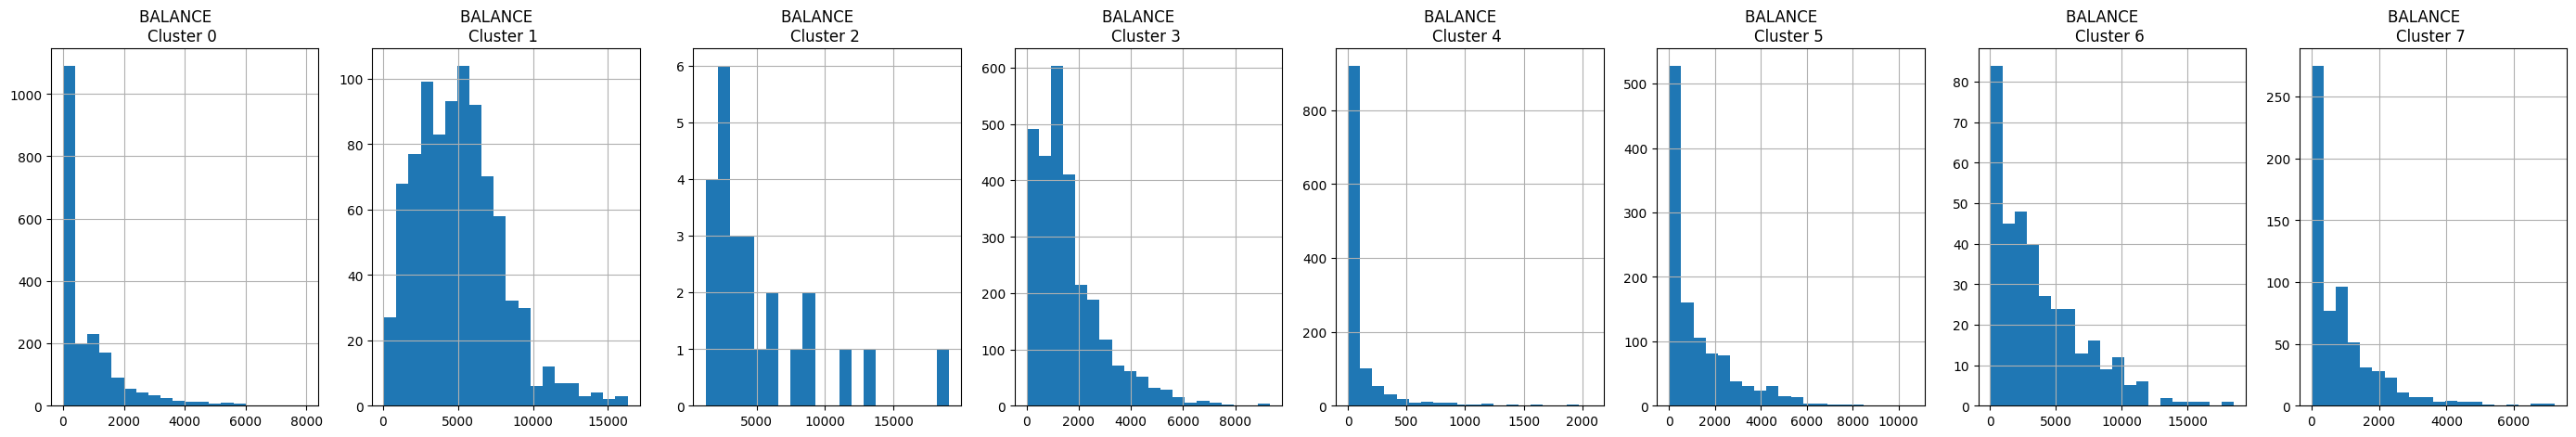

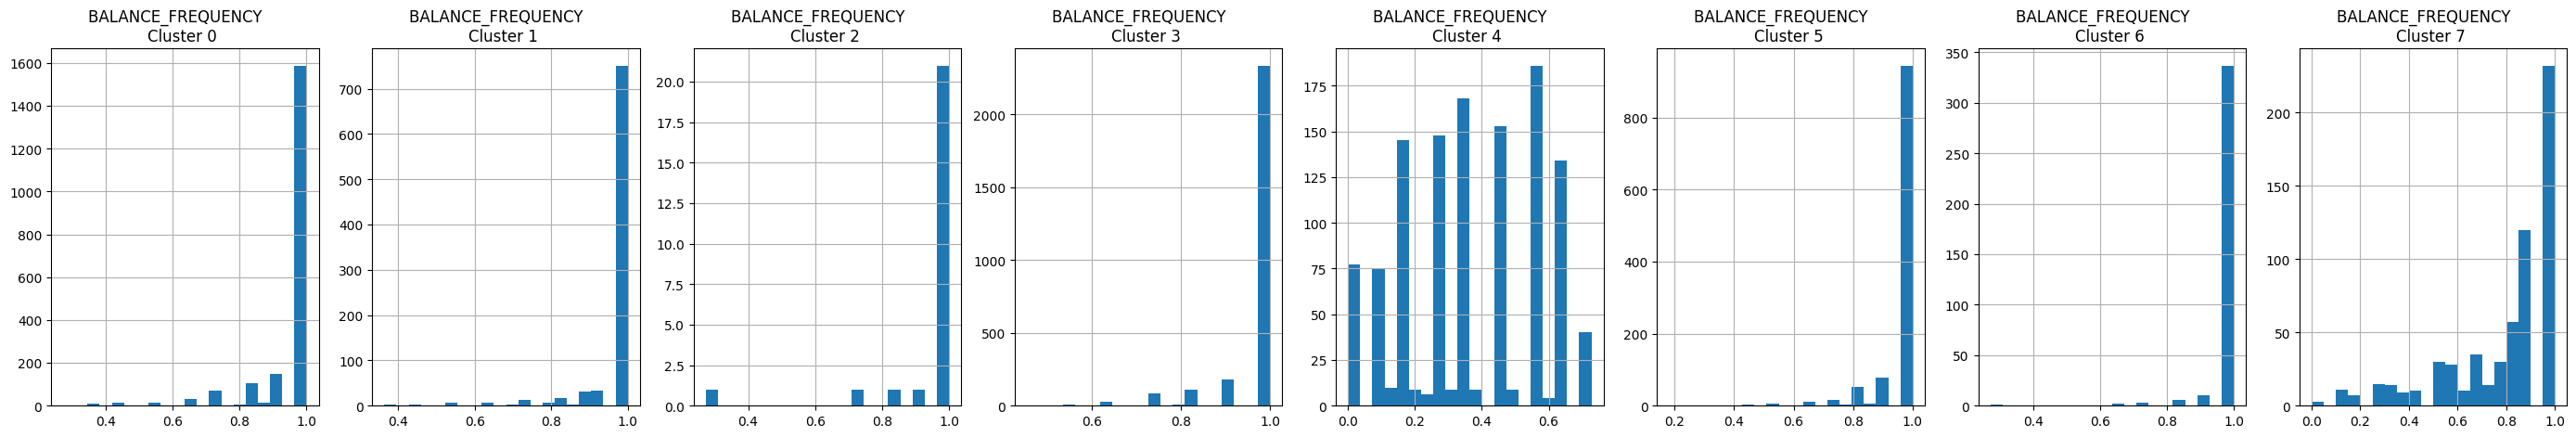

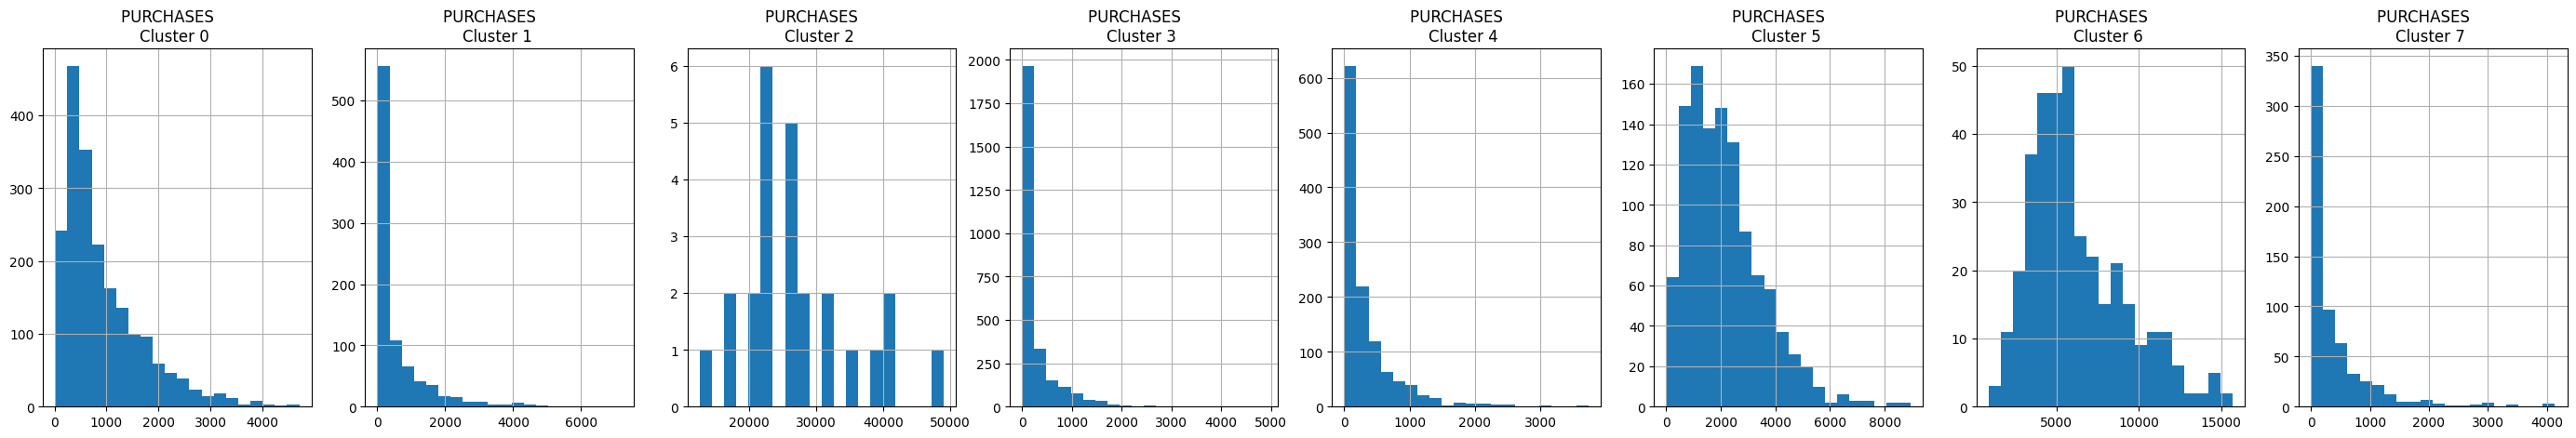

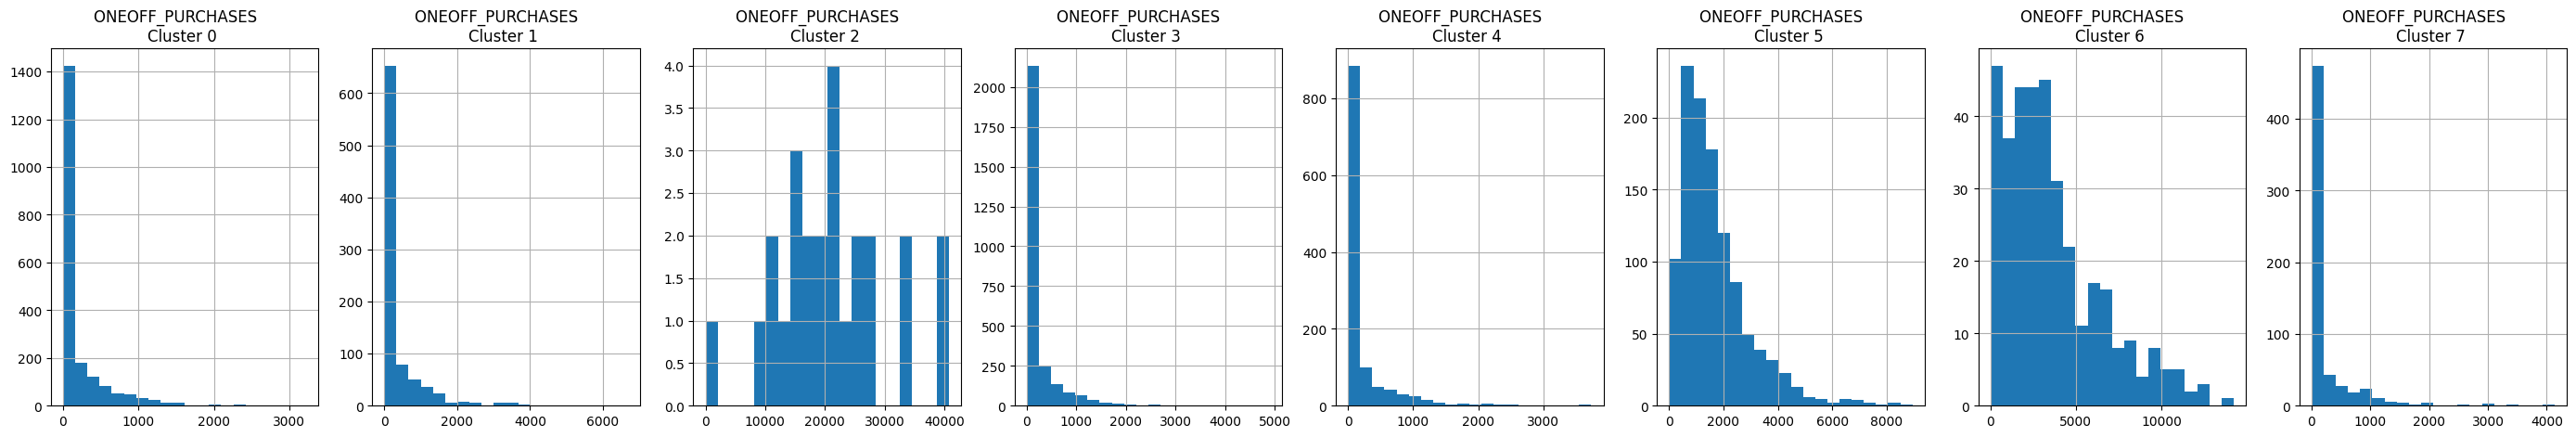

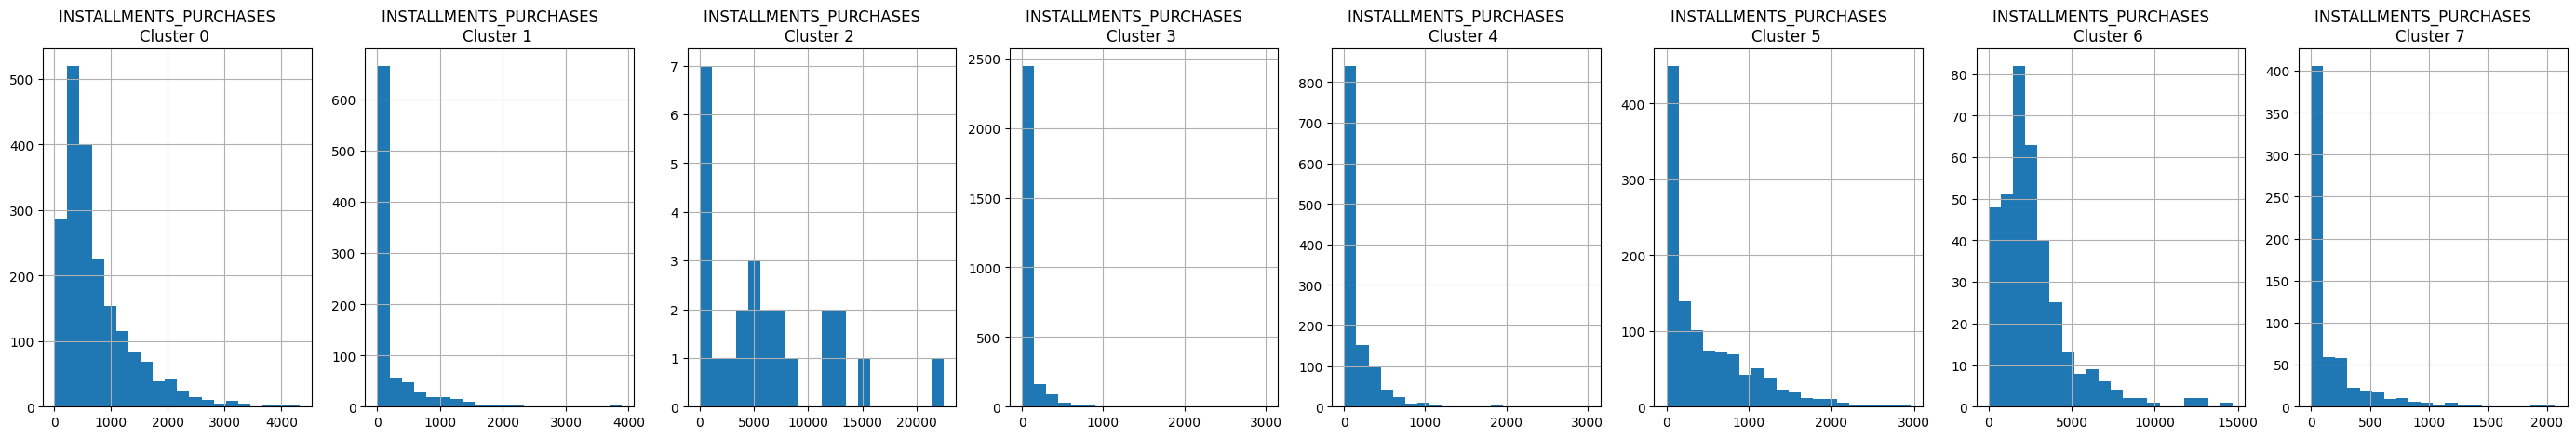

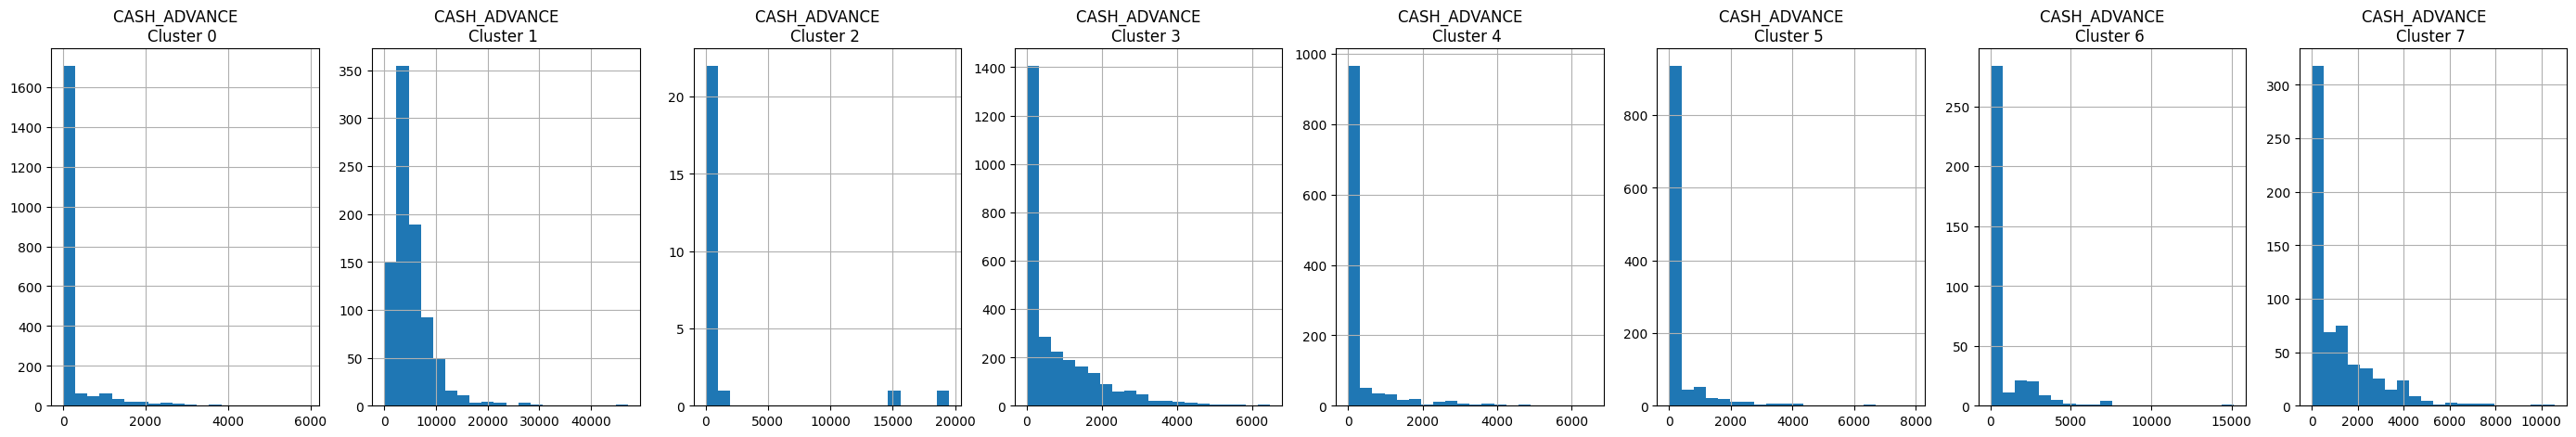

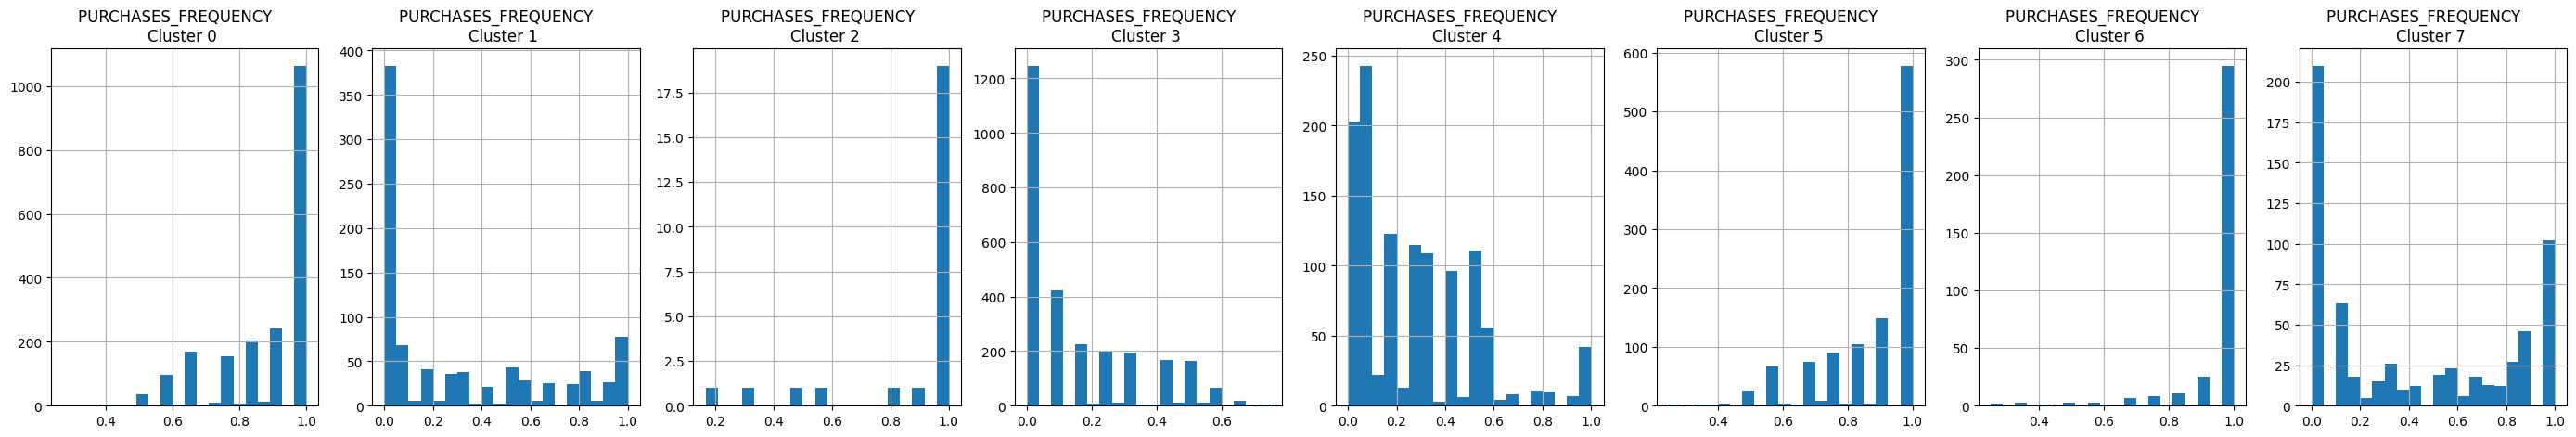

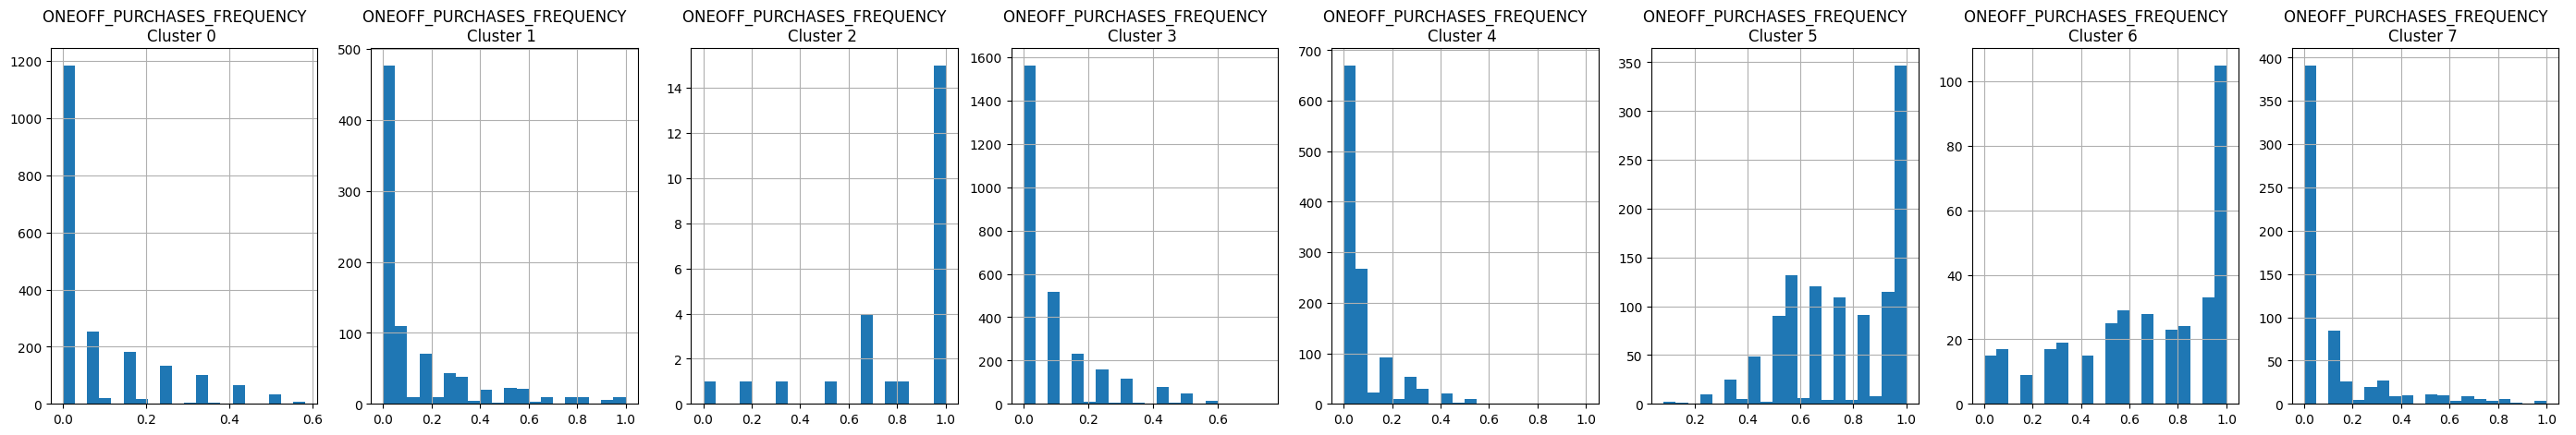

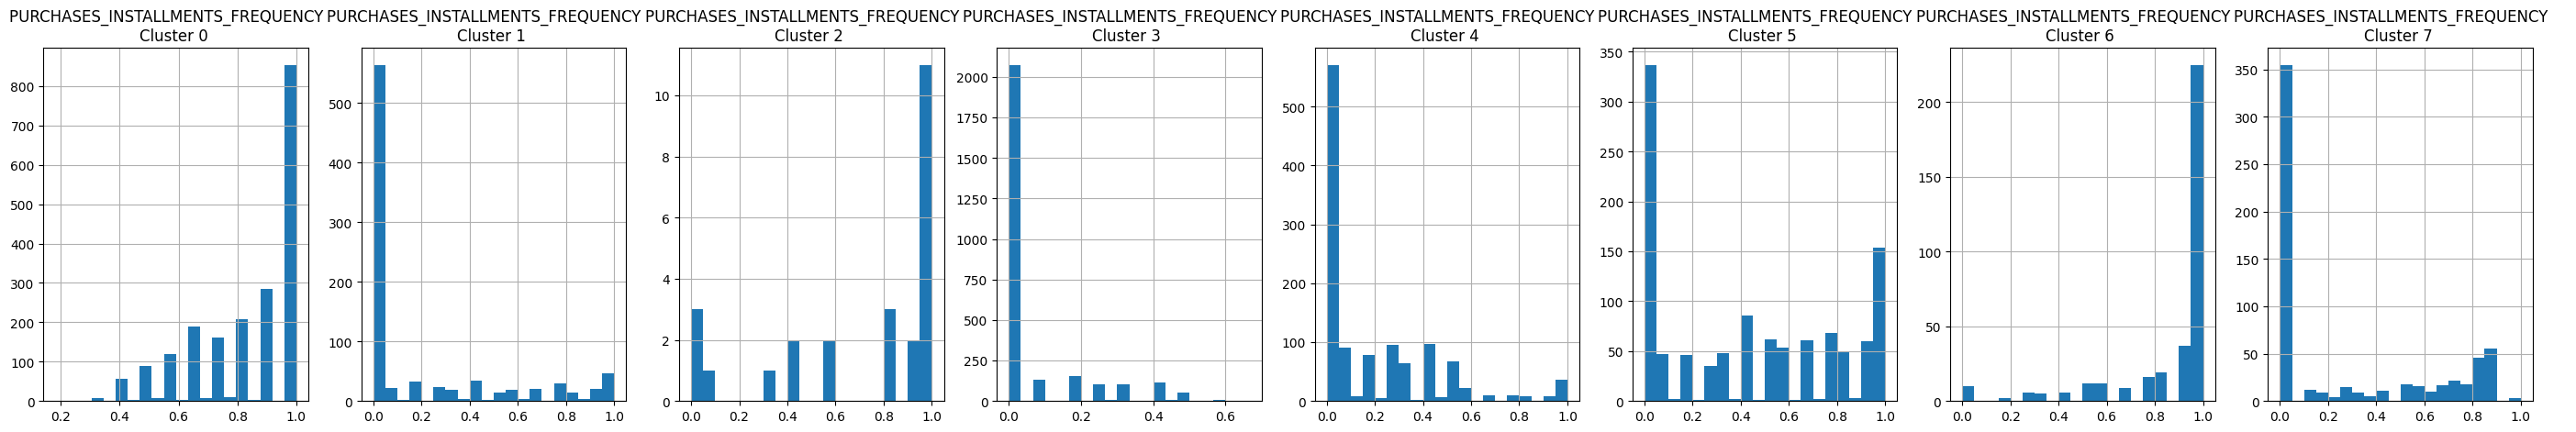

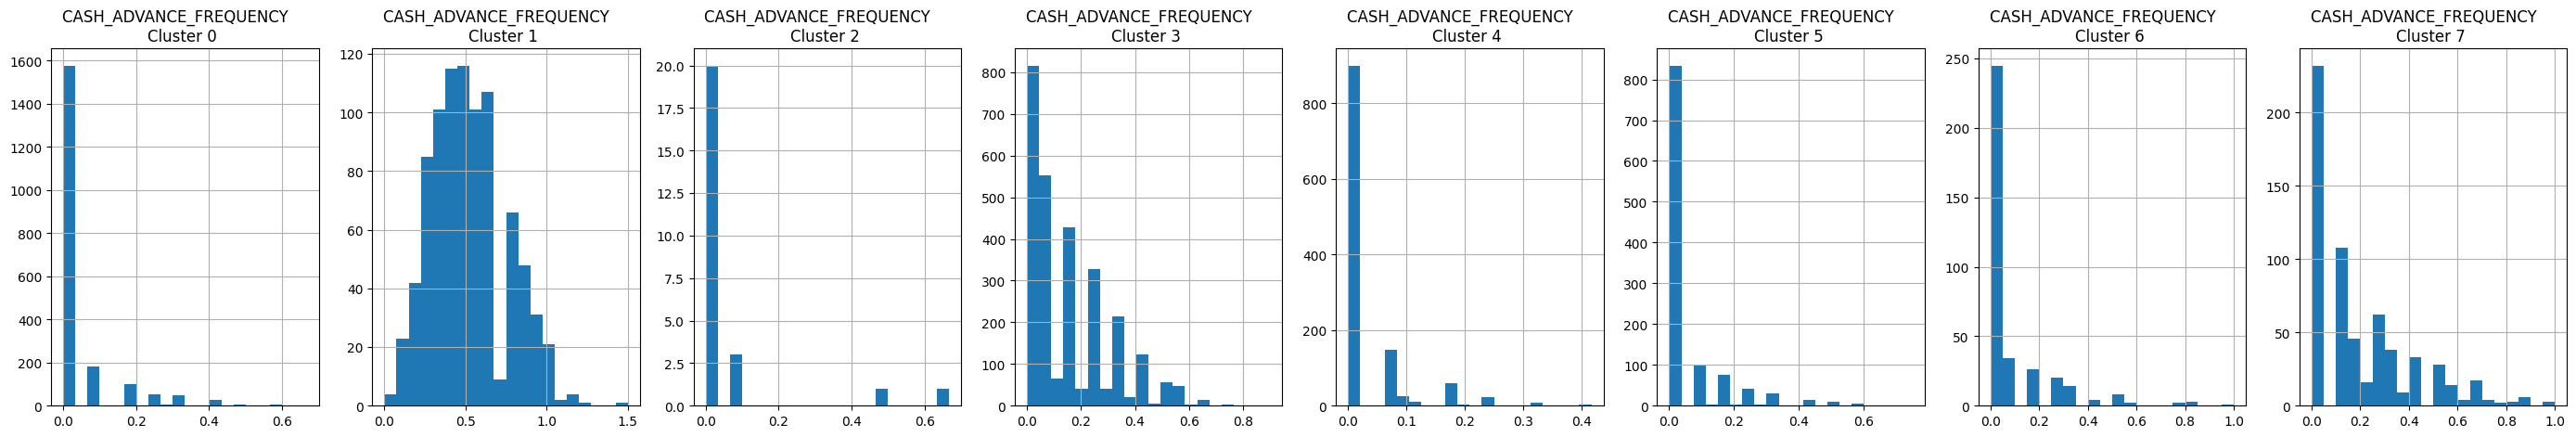

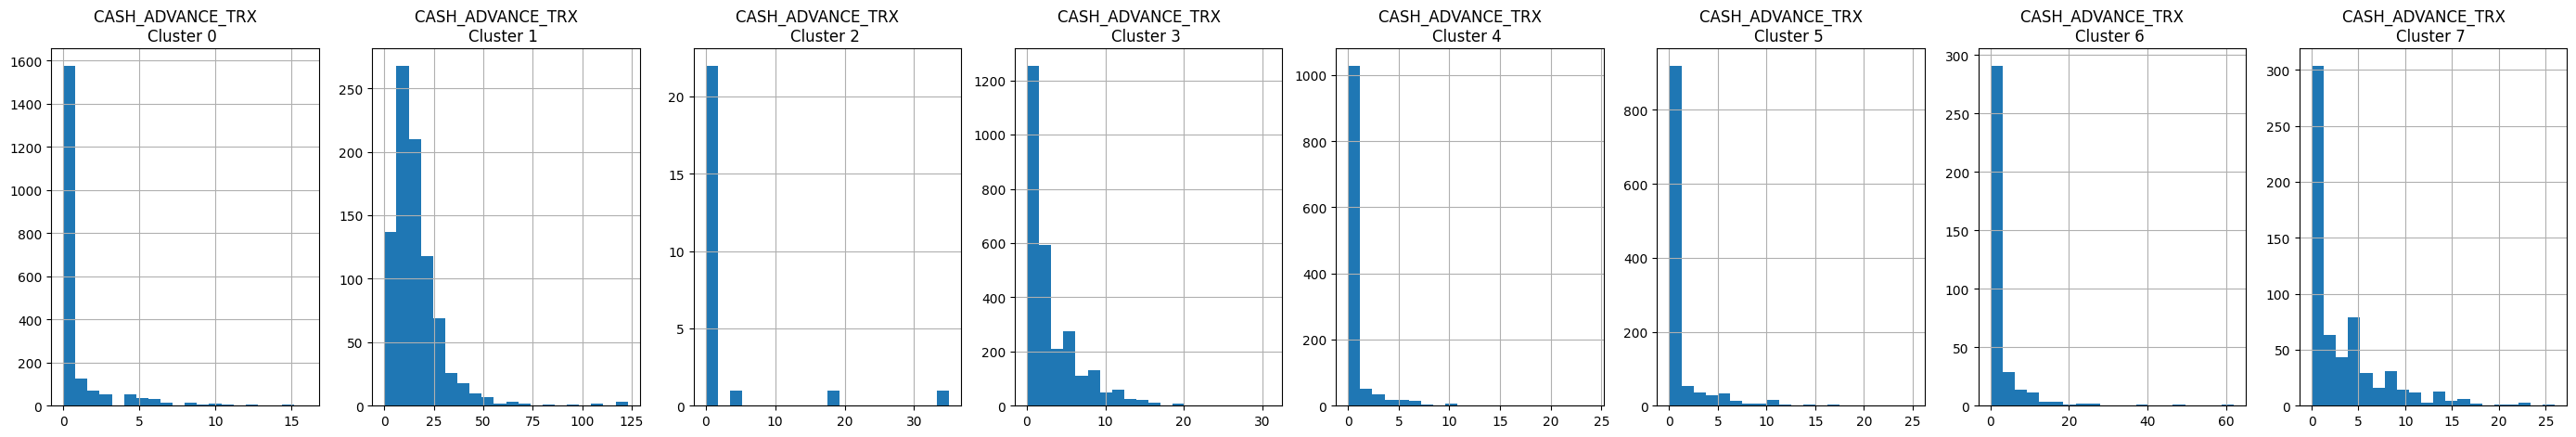

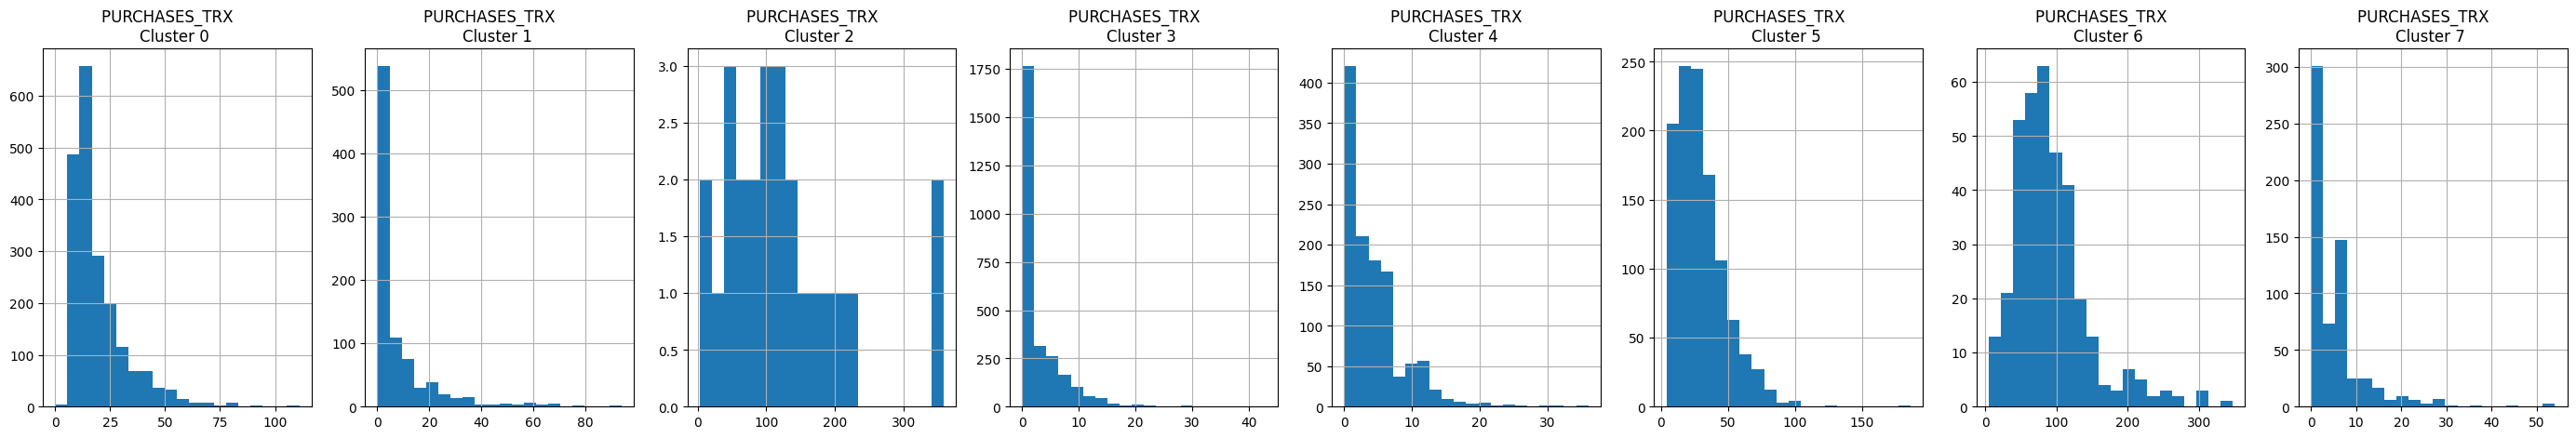

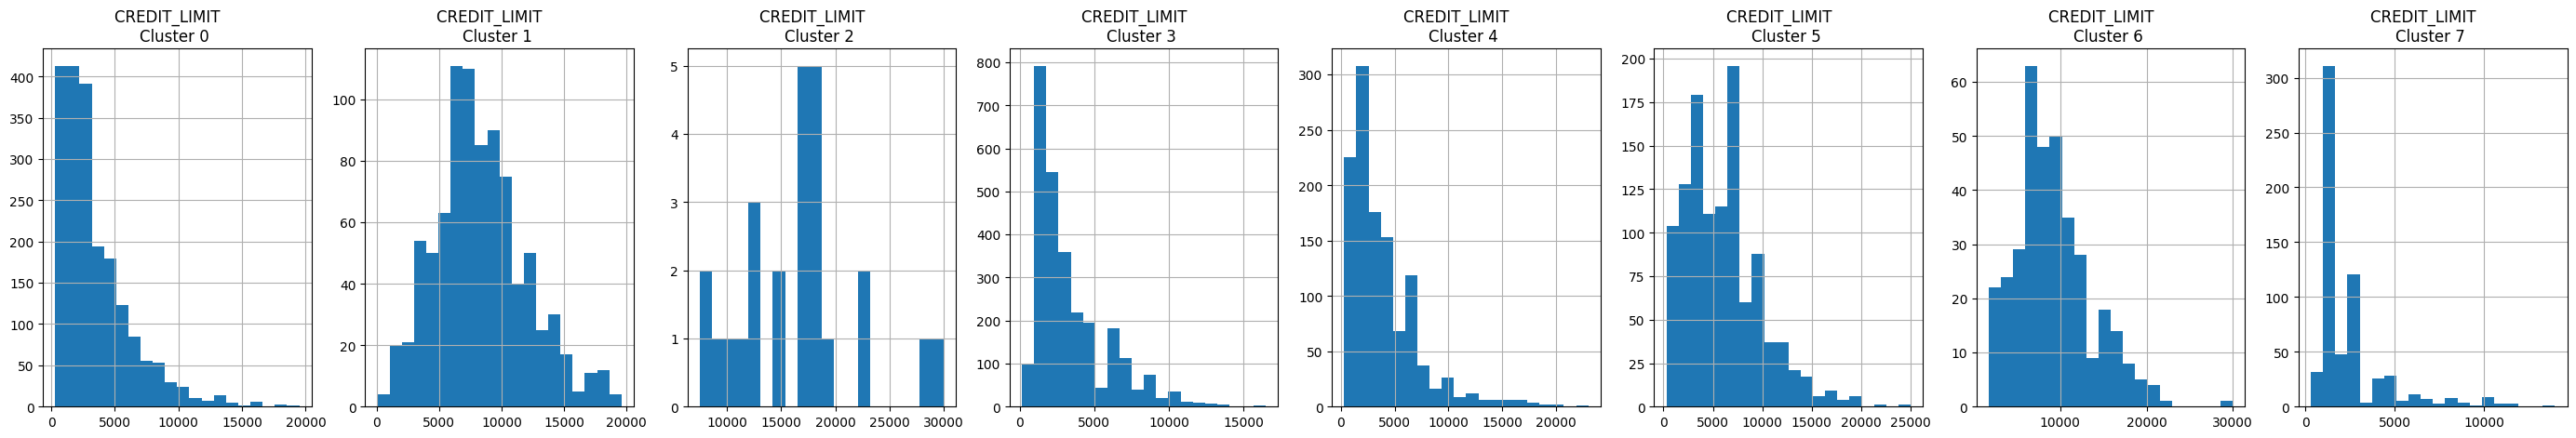

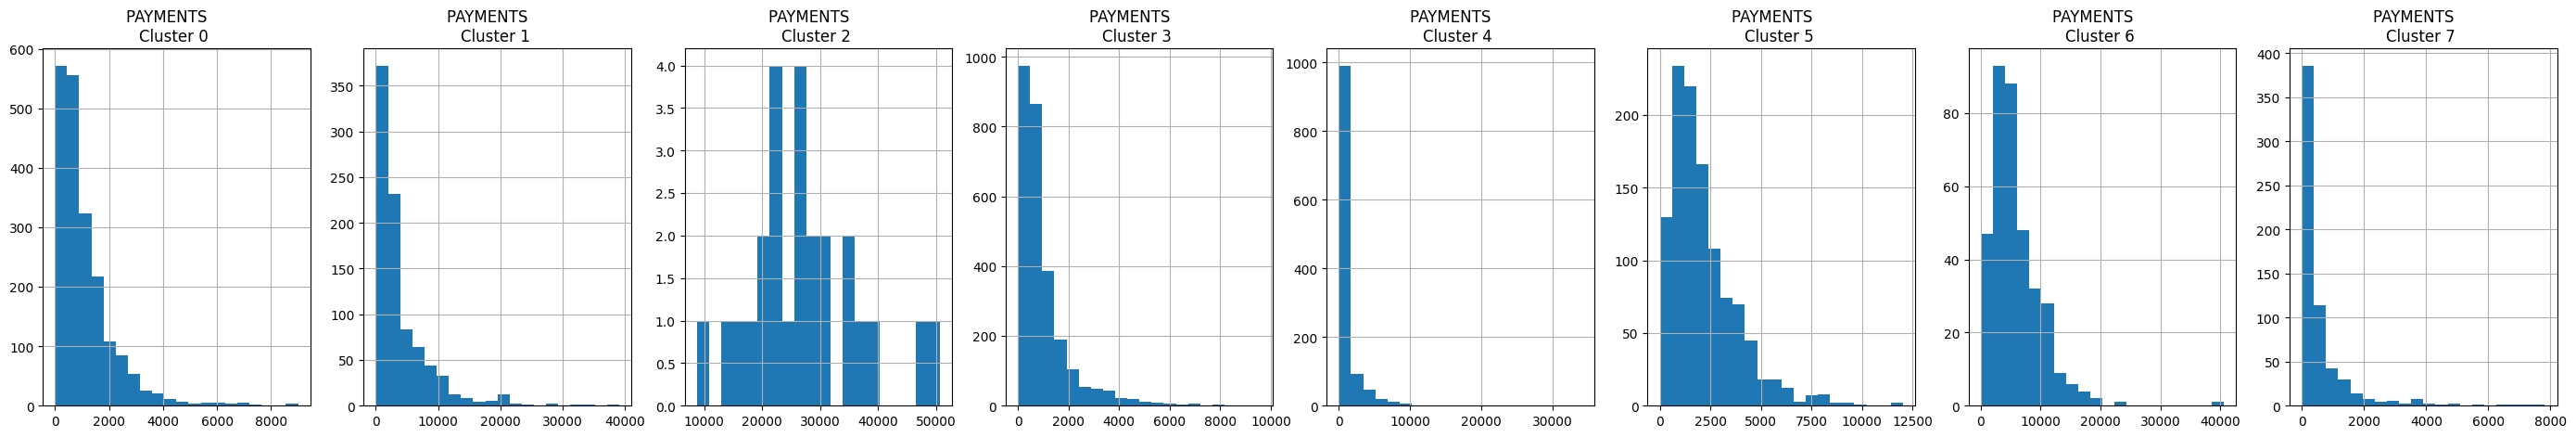

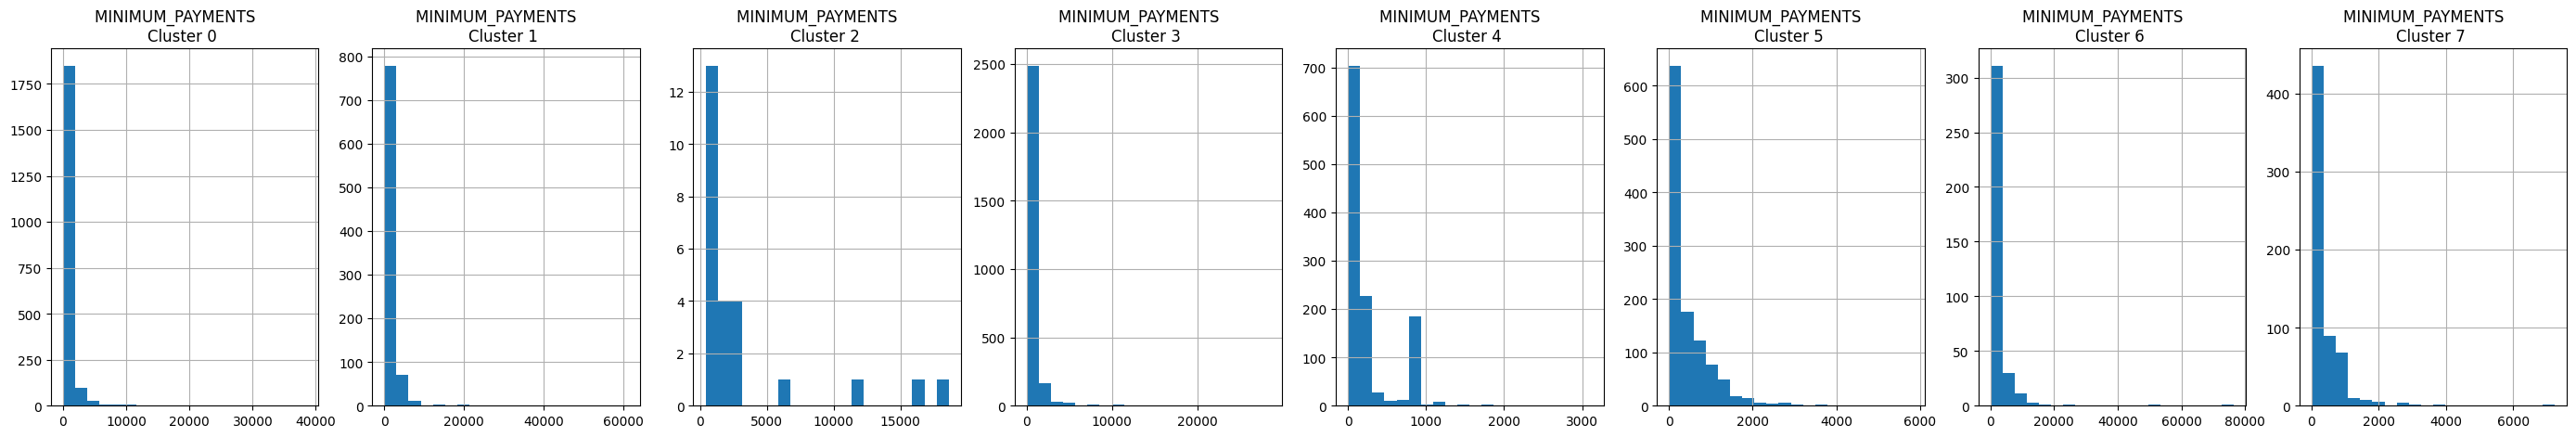

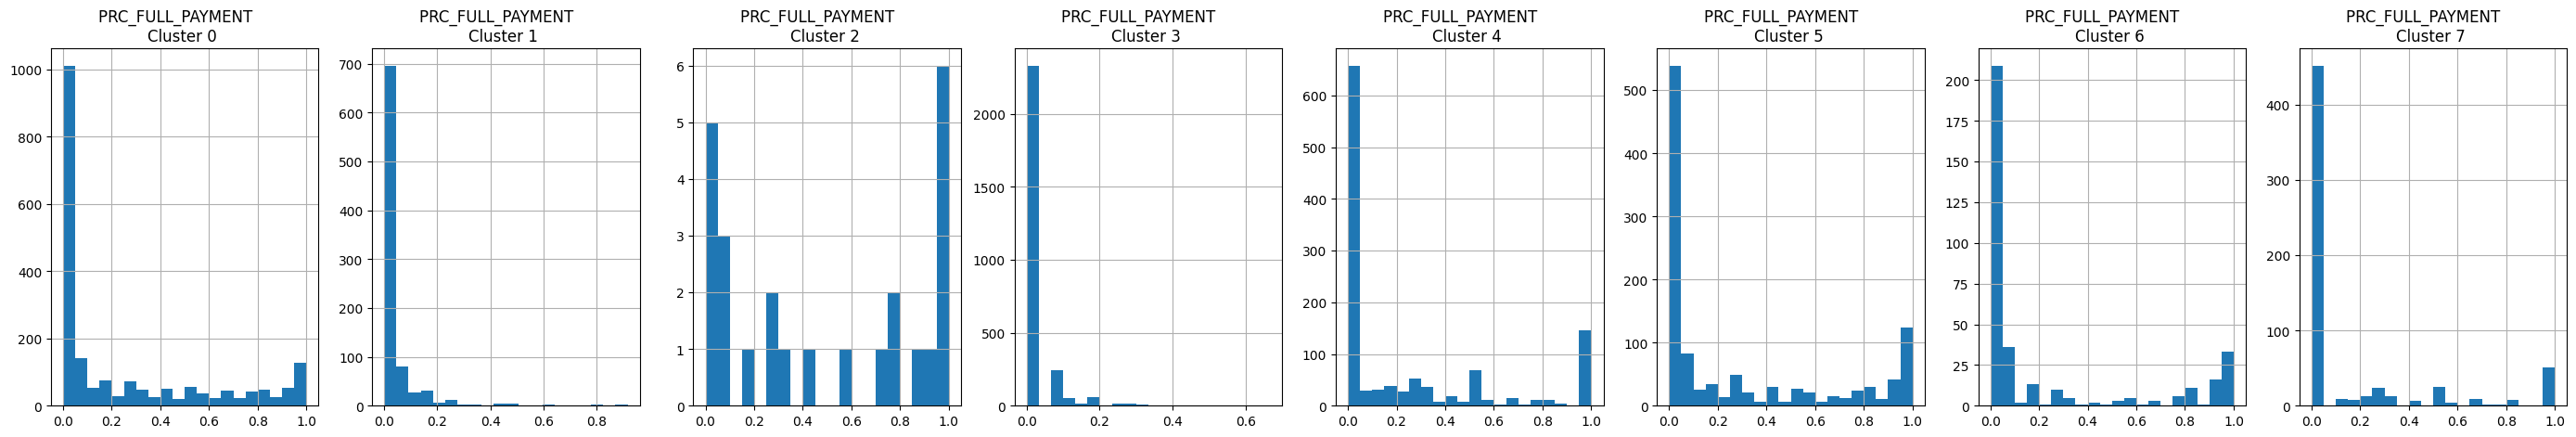

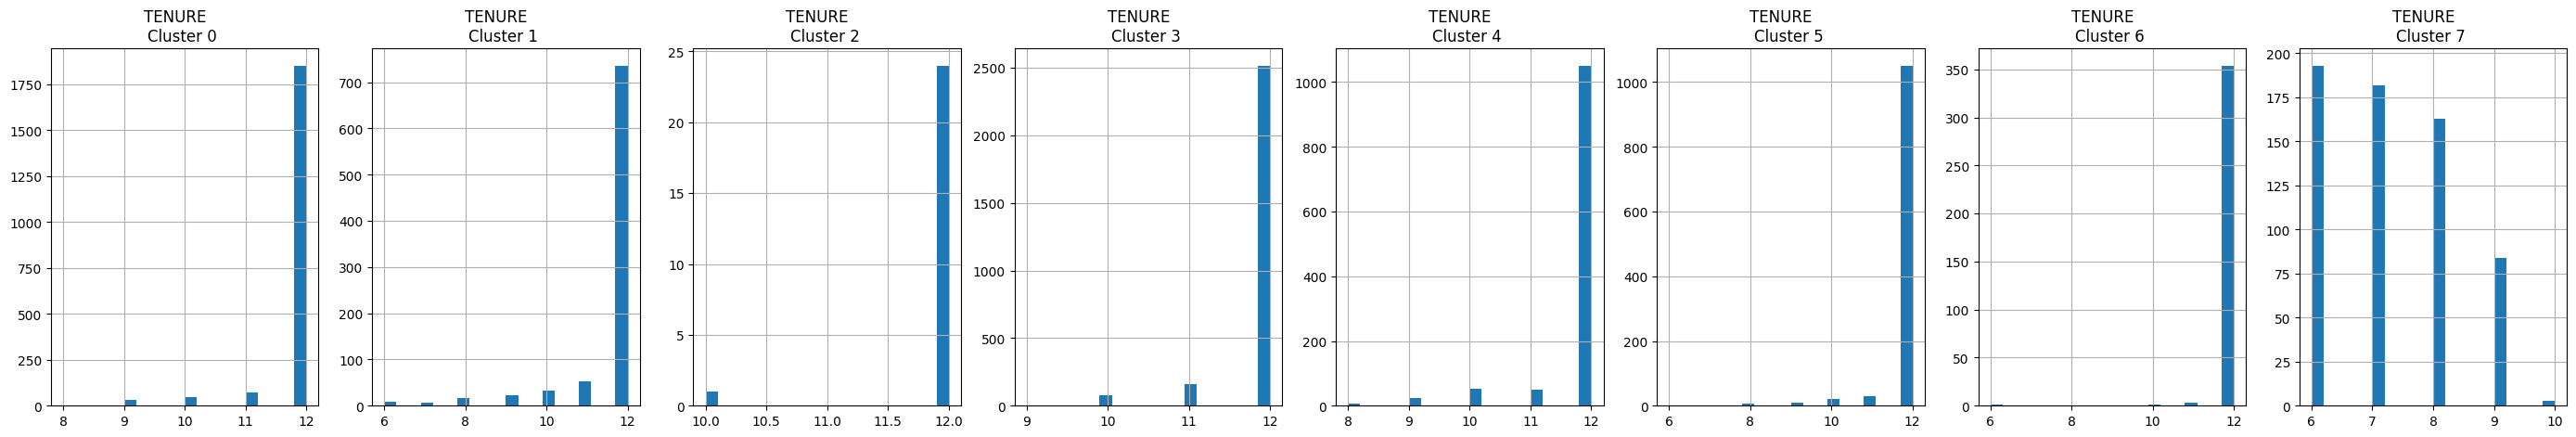

In [34]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster {} '.format(i,j))
        
    plt.show()

# Apply Principal Component Analysis and Visualize the Results

- PCA is an unsupervised machine learning algorithm.
- PCA performs dimensionality reductions while attempting at keeping the original information unchanged.
- PCA works by trying to find a new set of features called components.
- Components are composites of the uncorrelated given input features.

In [35]:
pca2 = PCA(n_components='mle')
principal_components2 = pca2.fit(creditcard_df_scaled)
principal_components2

PCA(n_components='mle')

In [36]:
principal_components2.explained_variance_ratio_ 
# 95% of the variance is explained by 2 components, so we can use 2 components for our clustering

array([0.27290037, 0.20301991, 0.08791979, 0.07479975, 0.06262792,
       0.05750211, 0.04887235, 0.04257486, 0.03828804, 0.03080006,
       0.02371897, 0.01773632, 0.01426492, 0.01217369, 0.0101299 ,
       0.00267034])

In [37]:
# Obtain the principal components
pca = PCA(n_components=2) # we choose 2 components for visualization purposes
principal_components = pca.fit_transform(creditcard_df_scaled)
principal_components

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [38]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_components,
                      columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [39]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,3
1,-1.138295,2.506477,1
2,0.969684,-0.383520,5
3,-0.873628,0.043166,3
4,-1.599434,-0.688581,3


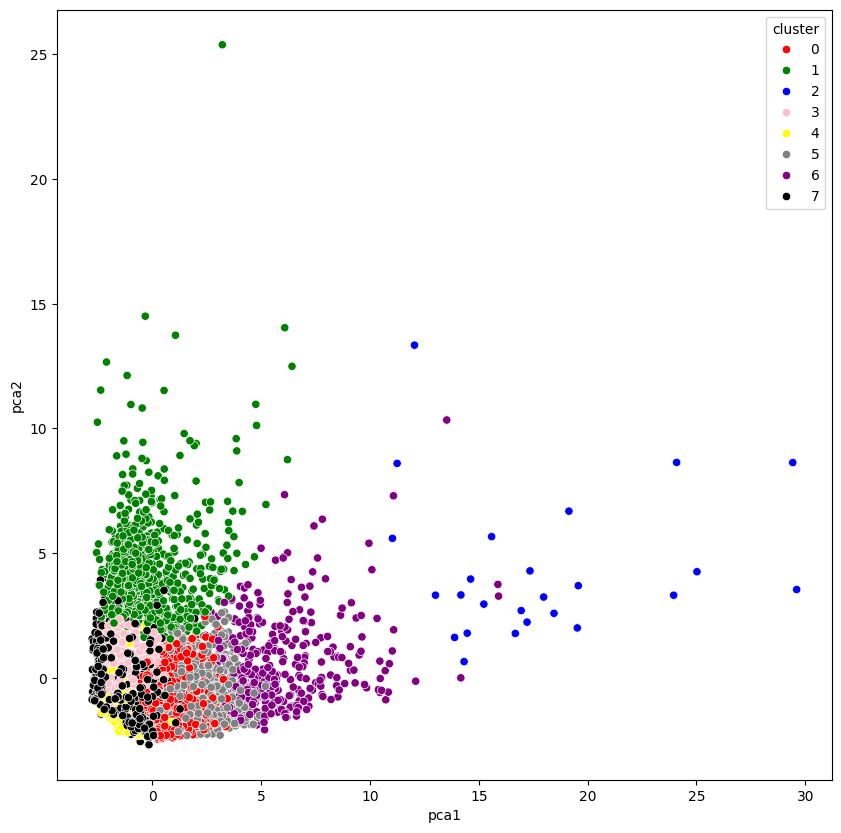

In [40]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# Understand the Intuition Behind Autoencoders

- Autoencoders are a type of Artificial Neural Network that are used to perform a task of data encoding (representation learning)
- Autoencoders use the same input data for the input and output.

# Apply Autoencoders (Perform Dimensionality Reduction using Autoencoders)

In [41]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))

# Glorot uniform initializer (Xavier normal initializer) draws samples from a truncated normal distribution.

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [42]:
creditcard_df_scaled.shape

(8950, 17)

In [43]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.6603
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2537
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1964
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1567
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1326
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1142
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1039
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1032
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0879
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0865
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0822
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0840
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0711
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0688
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0656
Epoc

In [46]:
autoencoder.save_weights('autoencoder.weights.h5')

In [47]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
pred.shape

(8950, 10)

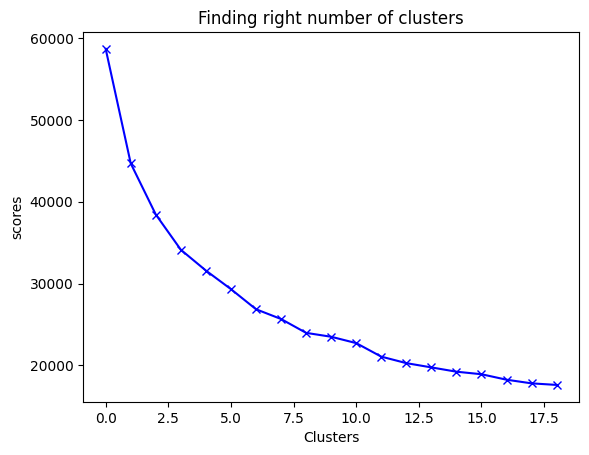

In [49]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_33172\3067751309.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_33172\3067751309.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


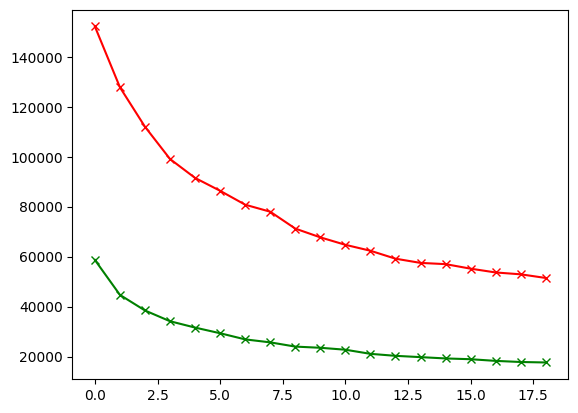

In [50]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [51]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [52]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [53]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.549034,-0.164763
1,0.623489,1.480425
2,0.262356,-0.116406
3,-0.592467,0.118570
4,-1.556456,-0.178226


In [54]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.549034,-0.164763,1
1,0.623489,1.480425,3
2,0.262356,-0.116406,1
3,-0.592467,0.118570,1
4,-1.556456,-0.178226,1


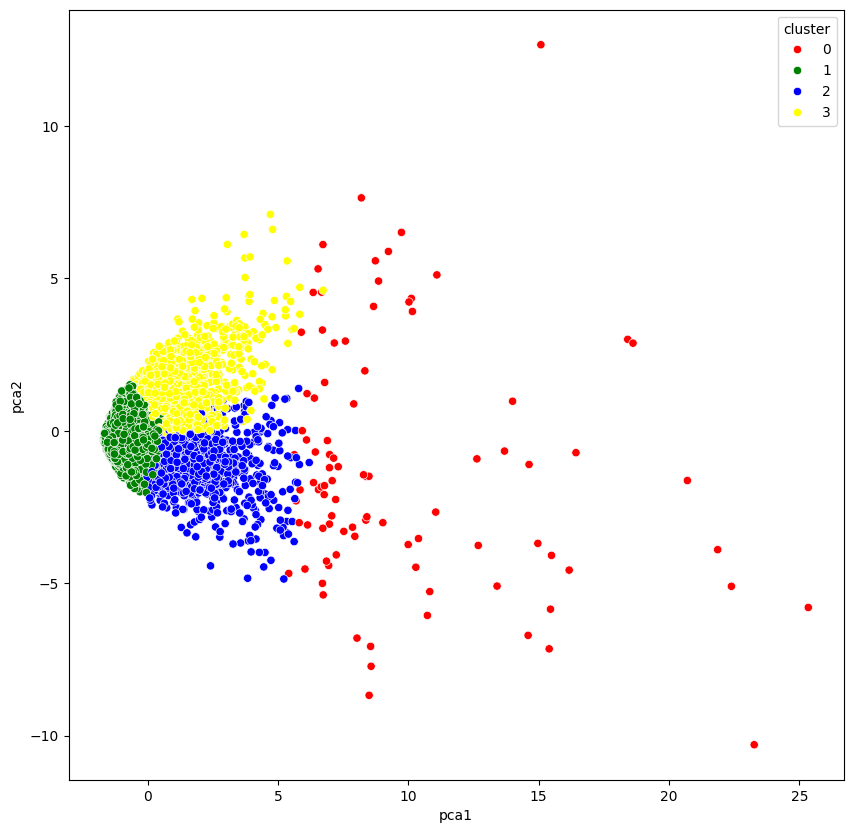

In [55]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()